#### Preprocess image data and boxes

This notebook stores the first 1000 images in the 100K training dataset as .npy file. Also, we preprocess the box coordinates for all the images in a format so that it can be fed to the model.

In [1]:
# Importing the required libraries
import argparse
import os 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np 
import pandas as pd
import PIL 
%matplotlib inline
import cv2
from tqdm import tqdm_notebook

In [3]:
os.chdir('..')
os.listdir()

['BB coordinates.xlsx',
 'object-detection-using-yolo-master',
 'object-detection-using-yolo-master.zip',
 'seg',
 'test images',
 'thermal',
 'thermal images']

In [5]:
directory = ['seg']
labels = []
for i in directory:
    for filename in os.listdir(i):
        f = os.path.join(i, filename)
        labels.append(f)

In [6]:
print(labels[1])

seg\10thres.jpg


In [8]:
PATH = r'C:\Users\paart\DL_IA'

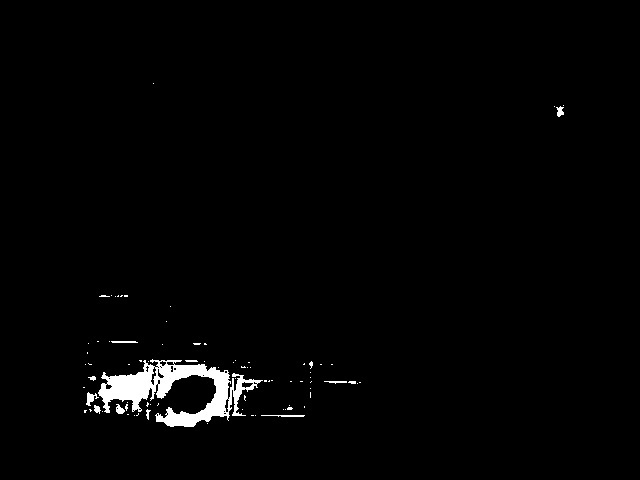

In [11]:
PIL.Image.open(PATH +'\\' + labels[0])

In [12]:
IMAGE_SIZE = plt.imread(PATH +'\\' + labels[0]).shape[:2]

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Label encoding the classes
lb = LabelEncoder()
labels = lb.fit_transform(labels)

TypeError: list indices must be integers or slices, not str

In [9]:
lb_cols = list(labels.columns)
lb_cols.remove('file')

In [10]:
fn = labels['file'].unique()

In [11]:
lb_cols = ['class', 'x_min', 'y_min', 'x_max', 'y_max']

In [12]:
# Preprocess the box coordinates for all the images stored in the 100K train dataset.
boxes = []
for i in tqdm_notebook(range(fn.shape[0])):
    boxes.append(labels[labels['file'] == fn[i]][lb_cols].values.reshape((-1,1))[:,0])

In [14]:
np.save('model/data/boxes.npy', boxes)

In [14]:
#Read the first 1000 images stored in the 100K train dataset and store it as a numpy array

from tqdm import tqdm_notebook
image_data = []
for f in tqdm_notebook(fn[:1000]):
    data = cv2.imread(PATH + f)
    image_data.append(data)

In [15]:
np.save('model/data/image_data.npy', image_data)